Text(10,35,'16.405')

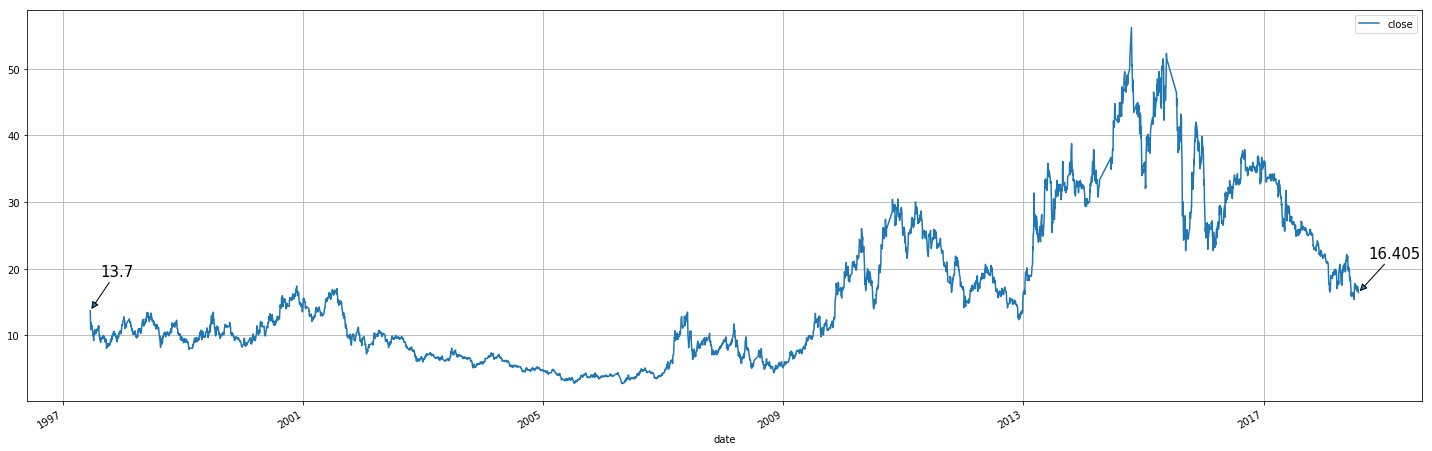

In [144]:
import numpy as np
import matplotlib.pyplot as plt
import tushare as ts
import pandas as pd

df=ts.get_k_data('000788', autype='hfq',start='1900-01-01')
df['date'] =  pd.to_datetime(df['date'],format='%Y-%m-%d')
df.index=df['date']
df.index=df.index.strftime('%Y-%m-%d')
df
ax=df.plot(kind='line', x='date',y=['close'],rot=30,grid=True,figsize=(25,8))
ax.annotate(df['close'][0],
             (df.index[0], df['close'][0]),
             xytext=(10, 35),
             size=15,
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))
count=len(df)
ax.annotate(df['close'][count - 1],
             (df.index[count - 1], df['close'][count - 1]),
             xytext=(10, 35),
             size=15,
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))

<class 'matplotlib.axes._subplots.AxesSubplot'>


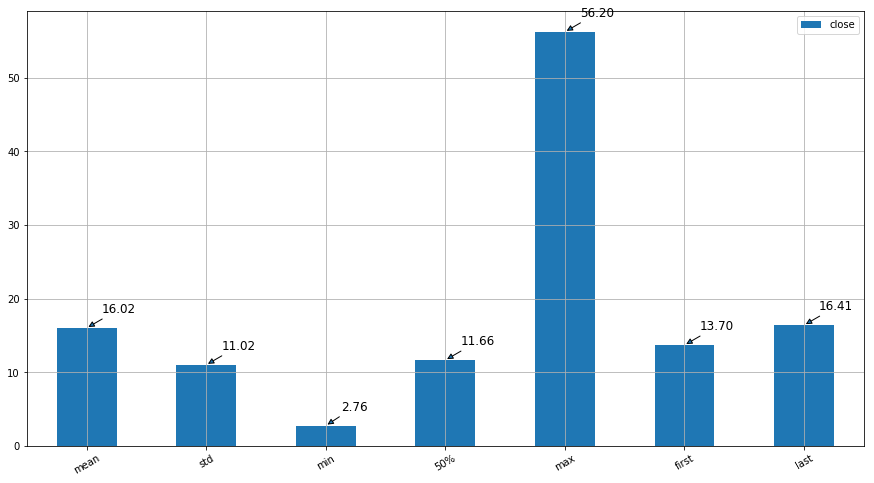

In [145]:
first=df.loc[df.index[:1],['open','close','high','low','volume']]
first.index=['first']
last=df.loc[df.index[count-1:],['open','close','high','low','volume']]
last.index=['last']

dfdesc=df.describe()
dfdesc=dfdesc.append(first,sort=False)
dfdesc=dfdesc.append(last,sort=False)

dfdesc.drop('count',inplace=True)
dfdesc.drop('25%',inplace=True)
dfdesc.drop('75%',inplace=True)

ax2=dfdesc.plot(kind='bar',y=['close'],rot=30,grid=True,figsize=(15,8))
print(type(ax2))

for i in range(len(dfdesc.index)):
    ax2.annotate("{0:.2f}".format(dfdesc['close'][i]),
             (i, dfdesc['close'][i]),
             xytext=(15, 15),
             size=12,
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))


<class 'matplotlib.axes._subplots.AxesSubplot'>


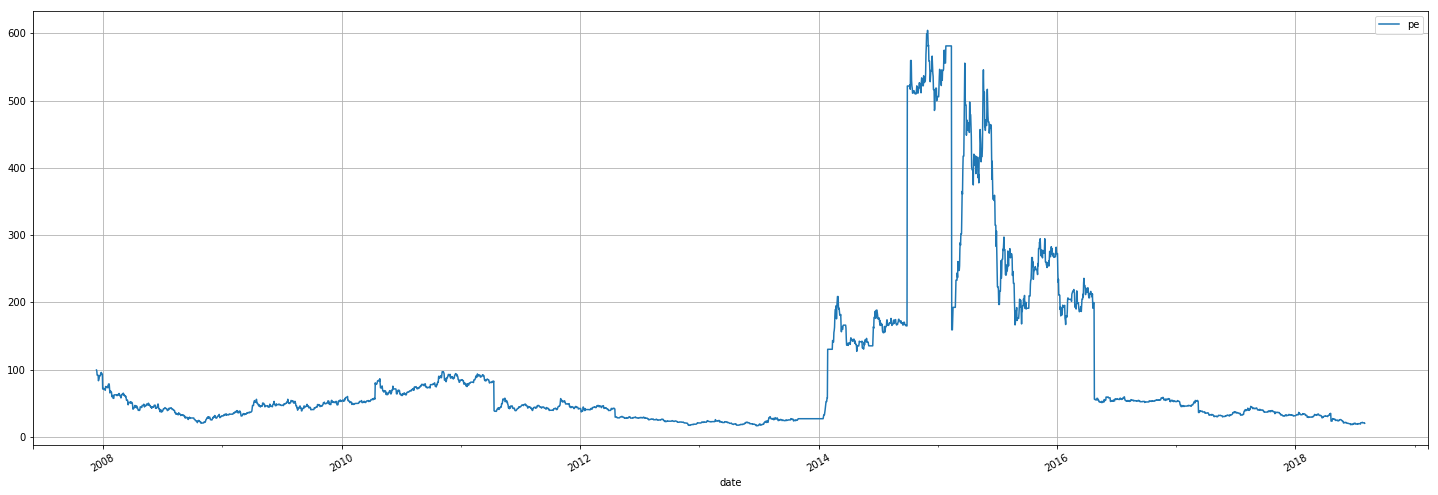

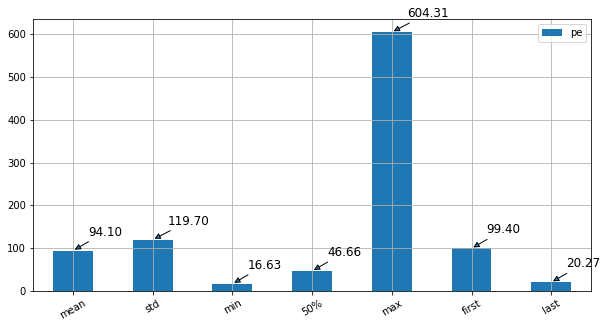

In [161]:

pro = ts.pro_api()
df=pro.daily_basic(ts_code='002195.SZ')
df['date'] =  pd.to_datetime(df['trade_date'],format='%Y%m%d')
df.index=df['date']
ax=df.plot(kind='line', x='date',y=['pe'],rot=30,grid=True,figsize=(25,8))

count=len(df)
last=df.loc[df.index[:1]]
last.index=['last']
first=df.loc[df.index[count-1:]]
first.index=['first']

dfdesc=df.describe()
dfdesc=dfdesc.append(first,sort=False)
dfdesc=dfdesc.append(last,sort=False)

dfdesc.drop('count',inplace=True)
dfdesc.drop('25%',inplace=True)
dfdesc.drop('75%',inplace=True)

ax3=dfdesc.plot(kind='bar',y=['pe'],rot=30,grid=True,figsize=(10,5))
print(type(ax2))

for i in range(len(dfdesc.index)):
    ax3.annotate("{0:.2f}".format(dfdesc['pe'][i]),
             (i, dfdesc['pe'][i]),
             xytext=(15, 15),
             size=12,
             textcoords='offset points',
             arrowprops=dict(arrowstyle='-|>'))
